 读取一幅灰度图像，在图像中添加椒盐噪声，显示生成的图像。

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取灰度图像
def load_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return img

# 显示图像
def show_image(original, noisy, title):
    plt.figure(figsize=(10, 5))

    # 显示原图
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # 显示带有椒盐噪声的图像
    plt.subplot(1, 2, 2)
    plt.imshow(noisy, cmap='gray')
    plt.title(f'{title} Image with Salt and Pepper Noise')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


In [22]:
def add_salt_and_pepper_noise(image, prob):
    """
    向图像中添加椒盐噪声。
    参数:
        image: 输入的灰度图像。
        prob: 噪声比例，0 到 1 之间，值越大噪声越多。
    返回:
        带有椒盐噪声的图像。
    """
    noisy_image = np.copy(image)
    # 生成与图像大小相同的随机矩阵
    random_matrix = np.random.rand(image.shape[0], image.shape[1])

    # 椒噪声 (设置为255 - 白色)
    noisy_image[random_matrix < prob / 2] = 0
    
    # 盐噪声 (设置为0 - 黑色)
    noisy_image[random_matrix > 1 - prob / 2] = 255

    return noisy_image


In [23]:
root_path = '/root/DIVP_project/'
einstein_path = "project02/proj02-images/einstein_orig.tif"
baboon_path = "project02/proj02-images/baboon.jpg"

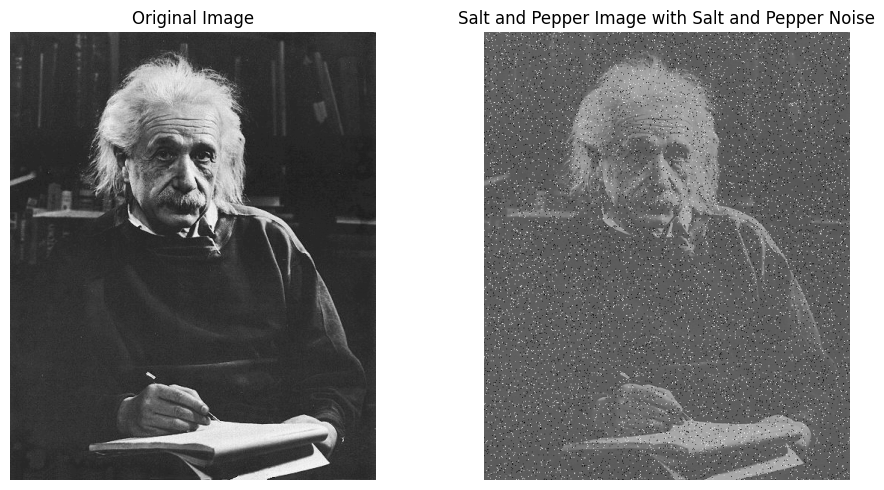

In [24]:
# 读取灰度图像
image_path = root_path + einstein_path  
img = load_image(image_path)

# 添加椒盐噪声
noise_prob = 0.05  # 椒盐噪声的比例 (0到1之间)
noisy_img = add_salt_and_pepper_noise(img, noise_prob)

# 显示结果
show_image(img, noisy_img, 'Salt and Pepper')

In [25]:
def median_filter_custom(image, kernel_size):
    """
    自实现中值滤波器。
    参数:
        image: 输入的灰度图像。
        kernel_size: 滤波器的窗口大小 (必须为奇数, 如3, 5, 7等)。
    返回:
        中值滤波后的图像。
    """
    # 获取图像的高度和宽度
    height, width = image.shape
    
    # 创建一个零填充的新图像用于保存滤波结果
    pad_size = kernel_size // 2
    padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)
    
    # 创建输出图像
    filtered_image = np.zeros_like(image)
    
    # 滤波操作
    for i in range(height):
        for j in range(width):
            # 获取当前像素的邻域
            region = padded_image[i:i + kernel_size, j:j + kernel_size]
            # 计算邻域的中值
            median_value = np.median(region)
            # 更新滤波后的图像
            filtered_image[i, j] = median_value

    return filtered_image


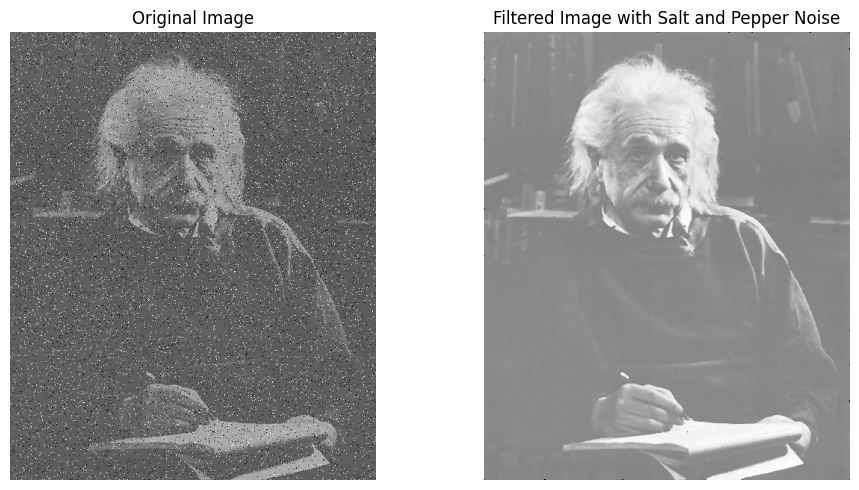

In [30]:
# 对带有椒盐噪声的图像进行中值滤波
filtered_img = median_filter_custom(noisy_img, kernel_size=3)
# 显示结果
show_image(noisy_img, filtered_img, 'Filtered')

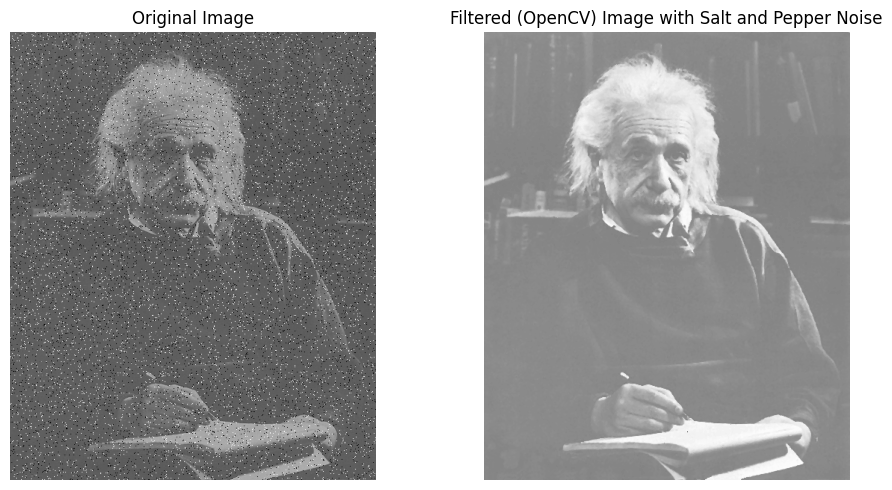

In [31]:
# 使用 OpenCV 中的中值滤波器去除椒盐噪声
filtered_img_cv = cv2.medianBlur(noisy_img, 3)
# 显示结果
show_image(noisy_img, filtered_img_cv, 'Filtered (OpenCV)')